<a href="https://colab.research.google.com/github/MaitriKhanna/Airbnb-Austin-data-analysis/blob/main/MaitriKhanna_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('gdrive')

Mounted at gdrive


In [3]:
import pandas as pd

In [4]:
lt= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/task/listings.csv')

In [5]:
lt.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [6]:
lt.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.027200e+04,1.027200e+04,0.0,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,7672.000000,10272.000000,10272.000000
mean,2.604226e+07,9.482466e+07,NaN,78723.162481,30.281591,-97.752913,255.656542,8.240654,31.720600,1.280021,19.581192,122.290401
std,1.500293e+07,1.111380e+08,NaN,20.827207,0.061041,0.058415,513.284268,23.416609,68.107864,1.697720,67.081990,138.467978
min,2.265000e+03,2.300000e+01,NaN,78701.000000,30.078870,-98.056630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.319740e+07,1.098138e+07,NaN,78704.000000,30.245163,-97.770485,82.000000,1.000000,0.000000,0.160000,1.000000,0.000000
50%,2.580636e+07,4.428986e+07,NaN,78722.000000,30.270175,-97.745035,136.000000,2.000000,5.000000,0.650000,1.000000,59.000000
75%,4.006138e+07,1.410198e+08,NaN,78745.000000,30.305237,-97.721430,250.000000,3.000000,29.000000,1.790000,4.000000,263.250000
max,4.811152e+07,3.879780e+08,NaN,78759.000000,30.515280,-97.560620,16264.000000,999.000000,951.000000,34.030000,358.000000,365.000000


Remove id and neighbourhood_group(only NaN values)

In [8]:
lt.drop(['id','neighbourhood_group'],axis=1,inplace=True)

In [9]:
lt.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [11]:
lt.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
host= lt['calculated_host_listings_count'].groupby(lt['host_name']).sum().sort_values(ascending=False)

In [13]:
host.head(10)

host_name
Kia                         129764
WanderJaunt                  17161
TurnKey Vacation Rentals      7214
Martin                        6743
Renters Club                  3136
Madalynn                      2304
Christian                     2029
Above                         1849
Lodgewell                     1444
Evolve Vacation Rental        1444
Name: calculated_host_listings_count, dtype: int64

##TOP HOSTS ARE
host_name- Total Listings

Kia        -                 129764

WanderJaunt          -        17161

TurnKey Vacation Rentals   -   7214

Martin              -          6743

Renters Club          -        3136

Madalynn         -             2304

Christian         -            2029

Above             -            1849

Lodgewell      -               1444

Evolve Vacation Rental   -     1444


In [14]:
area= lt['calculated_host_listings_count'].groupby(lt['neighbourhood']).sum().sort_values(ascending=False)

In [15]:
area.head(10)

neighbourhood
78745    26733
78751    23334
78758    22029
78735    20357
78702    19429
78701    15938
78704    13740
78729    10191
78754     6326
78717     6299
Name: calculated_host_listings_count, dtype: int64

##TOP AREAS WITH HIGHEST NO. OF LISTINGS
neighbourhood- No. of Listings

78745 -   26733

78751 -   23334

78758 -   22029

78735 -   20357

78702 -   19429

78701 -   15938

78704 -   13740

78729  -  10191

78754  -   6326

78717  -   6299

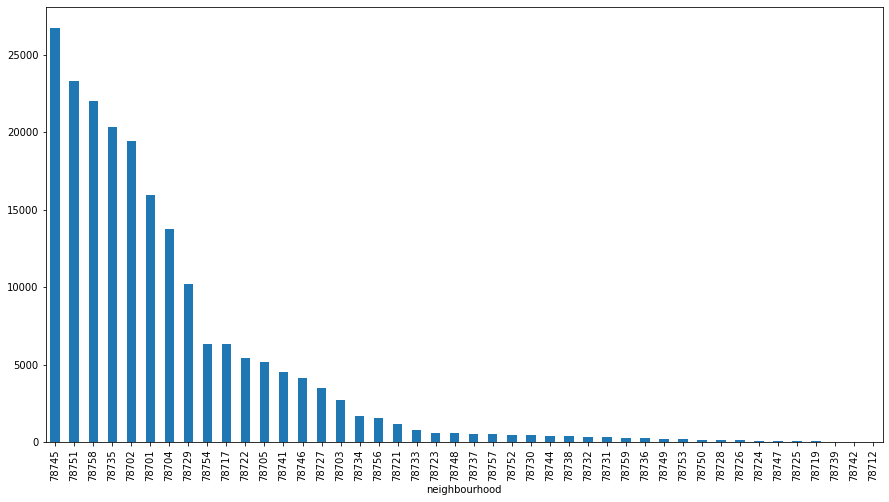

In [40]:
area.plot(kind='bar',figsize=(15,8))

In [16]:
lt.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [17]:
lt.isnull().sum()

name                                 0
host_id                              0
host_name                            5
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2600
reviews_per_month                 2600
calculated_host_listings_count       0
availability_365                     0
dtype: int64

- reviews_per_month is not found for some values which means airbnb didn't recieve a review. Replacing values by 0.

In [30]:
lt['reviews_per_month'].fillna(0,inplace=True)

- removing the last review column as many values are missing

In [31]:
lt.drop(['last_review'],axis=1,inplace=True)

In [32]:
lt.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27750,-97.71398,Entire home/apt,200,7,24,0.17,3,131
1,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27577,-97.71379,Private room,114,30,9,0.06,3,0
2,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26112,-97.73448,Entire home/apt,104,2,543,3.74,1,354
3,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,78704,30.24630,-97.76361,Entire home/apt,46,30,21,0.15,2,67
4,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,259,1.96,1,79


In [33]:
lt.isnull().sum()

name                              0
host_id                           0
host_name                         5
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

-replacing missing host_name

In [34]:
lt['host_name'].fillna("@",inplace=True)

## For neighbourhood 78745

In [41]:
ng= lt[lt['neighbourhood']==78745]

In [42]:
ng.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
71,South Austin- close to the action!,746286,Isabel,78745,30.19318,-97.82095,Entire home/apt,75,3,3,0.04,1,66
97,Stylish 3/2/2 with large backyard,1282837,Joseph,78745,30.18844,-97.78975,Entire home/apt,185,30,56,0.51,2,316
101,Big cute clean Casita in SxSAustin!,1568741,Jim O',78745,30.20948,-97.76969,Entire home/apt,69,3,116,1.05,7,358
104,Very convenient for SxSW,1617870,John,78745,30.21350,-97.78090,Entire home/apt,600,3,2,0.02,1,365
154,Private South Austin Guest House,1798140,Scott,78745,30.22062,-97.77387,Entire home/apt,110,30,20,0.18,1,275


In [43]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


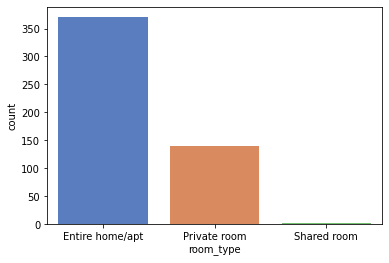

In [44]:
sns.countplot(ng.room_type,palette="muted")

Therefore, we can say that maximum listings are of Entire home/apt.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


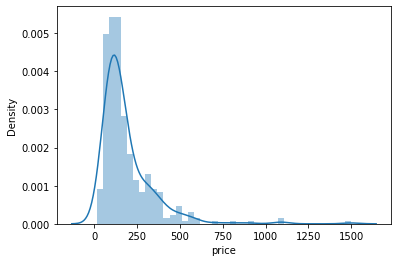

In [46]:
#price distribution of Entire home/apt
ng1=ng[ng.room_type=='Entire home/apt']
sns.distplot(ng1['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


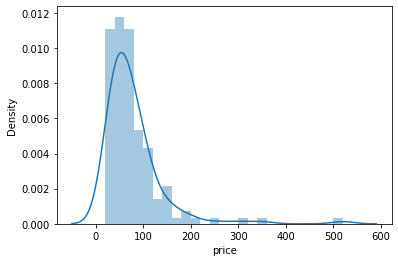

In [47]:
#price distribution of private rooms
ng2=ng[ng.room_type=='Private room']
sns.distplot(ng2['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


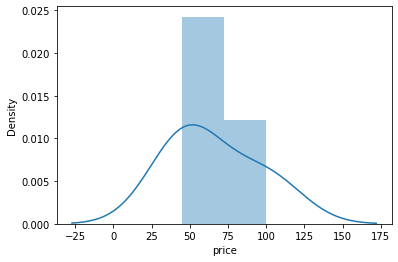

In [48]:
#price distribution of shared room
ng3=ng[ng.room_type=='Shared room']
sns.distplot(ng3['price'])

- We can say that in neighbourhood 78745, avg difference in prices of Entire home and Private room is 75 dollars.
- Shared rooms are preferred least in this area

## Distribution of availability of rooms throughout the year and minimum nights people staying there.

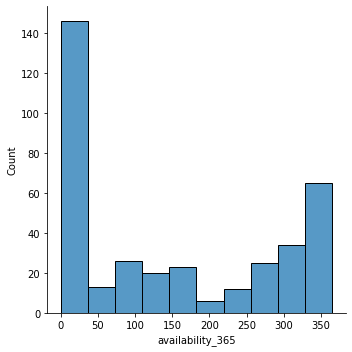

In [50]:
# for Entire house/apt
sns.displot(ng1['availability_365'])

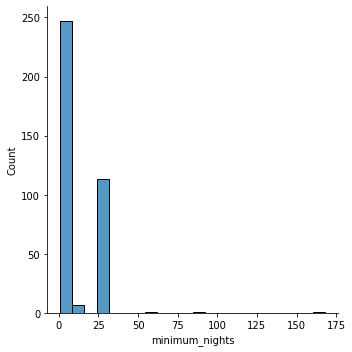

In [51]:
sns.displot(ng1['minimum_nights'])

##For Entire house/apt
- Majority of houses are available for either one month or for whole year.
- Majority of people prefer to spend less than a month in the house.

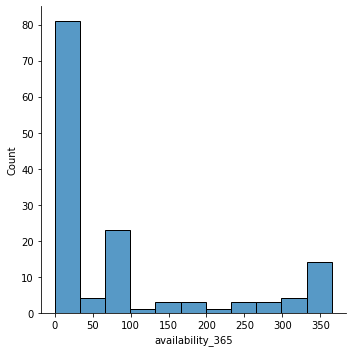

In [52]:
# for private room
sns.displot(ng2['availability_365'])

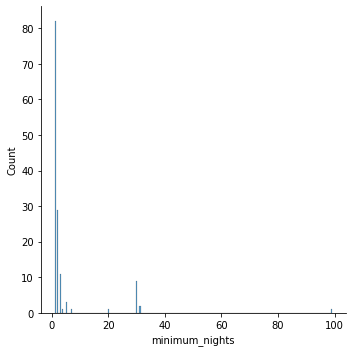

In [53]:
sns.displot(ng2['minimum_nights'])

##For Private rooms
- Majority of people prefer to spend less than 10 days in priate rooms

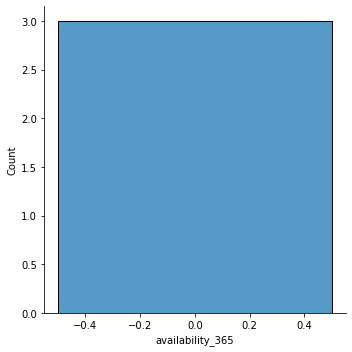

In [58]:
#for Shared Rooms
sns.displot(ng3['availability_365'])

##Latitude vs Longitude for neighbourhoods Austin

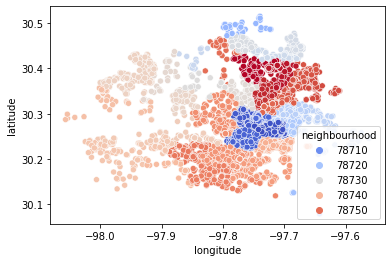

In [59]:
sns.scatterplot(y=lt.latitude,x=lt.longitude,hue=lt.neighbourhood,palette="coolwarm")

##Latitude vs Longitude depending on room type Austin

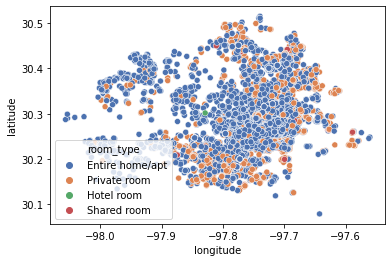

In [61]:
sns.scatterplot(y=lt.latitude,x=lt.longitude,hue=lt.room_type,palette="deep")

In [63]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.7MB/s 
     |████████████████████████████████| 6.5MB 10.1MB/s 
     |████████████████████████████████| 15.3MB 268kB/s 


In [64]:
import geopandas as gpd

In [65]:
neigh= gpd.read_file('/content/gdrive/MyDrive/Colab Notebooks/task/neighbourhoods.geojson')

In [66]:
!pip install folium

In [67]:
import folium

In [68]:
m= folium.Map()

In [69]:
folium.Choropleth(geo_data=neigh).add_to(m)

In [70]:
m